# Tercer entregable: Regresión
## 1. La fiebre del <font color='#FFD700'> Oro </font>

Tal y como vimos en la entrega anterior, una de las estrategias destacadas para ganar (especialmente desde el lado azul) es el oro generado, juntamente con el total de torretas destruidas.

Para ello, hemos querido profundizar en qué debe tener en cuenta un jugador cuando entre en partida. Dicho de otra forma, qué estrategias se deben (o no) seguir para generar más oro. Y que mejor para identificar estas que con regresiones, para así identificar qué variables guardan más relación con nuestra variable objetivo (gold_earned).

Dicho esto, simplemente notificar que la metodología de extracción de datos para esta entrega ha sido la misma que en la entrega anterior, pero en este caso, con el conocimiento que se tiene del juego, se han seleccionado variables distintas.

## 2. Desarrollo

### 2.1 Procesado inicial
#### - Limpieza

#### Carga de paquetes

In [182]:
import os
import pandas as pd
import numpy as np
import json
from tqdm import tqdm
import pickle
import time


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report






#### Obtención de los datos

In [183]:
'''
    Takes the JSON files for the matches' data, extracts the relevant features and saves
    all of it in tabular form
'''



np.seterr(divide='ignore', invalid='ignore')
start = time.time()
total_matches = 0

dirname = './collected_data'
 
ext = '.json'

final_filename = "./data_champs.csv"

to_save = []
 
for file in os.listdir(dirname):
    total_matches = 0
    if file.endswith(ext) and '_matches_' in file:
        with open(os.path.join(dirname,file), "r") as jfile:

            data = json.load(jfile)
            data = data["match_data"]
            max_matches_to_save = 10


            print(f">> Working through the data in: {file} <<")

            for m in tqdm(data):

                if m["gameMode"] != 'CLASSIC':
                    continue
                else:
                    # updated running game count
                    total_matches += 1

                    game_duration = m["gameDuration"]

                    if m["platformId"] == "EUW1":
                        region = 0
                    elif m["platformId"] == "NA1":
                        region = 1
                    else:
                        region = 2

                    # loop through players to add above data
                    for p in m["participants"]:
                        assists = p["assists"]
                        baronKills = p["baronKills"]
                        champ_experience = p["champExperience"]
                        champ_level = p["champLevel"]
                        challenges_list = p.get("challenges", {})
                        skills_dodge = challenges_list.get("skillshotsDodged",0)
                        skills_hit = challenges_list.get("skillshotsHit",0)
                        ability_uses = challenges_list.get("abilityUses",0)
                        heralds = challenges_list.get("riftHeraldTakedowns",0)
                        damage_dealt_to_buildings = p["damageDealtToBuildings"]
                        damage_self_mitigated = p["damageSelfMitigated"]
                        deaths = p["deaths"]
                        gold_earned = p["goldEarned"]
                        gold_spent = p["goldSpent"]
                        individual_position = p["individualPosition"]
                        kills = p["kills"]
                        magic_damage_dealt_to_champions = p["magicDamageDealtToChampions"]
                        neutral_minions_killed = p["neutralMinionsKilled"]
                        physical_damage_dealt_to_champions = p["physicalDamageDealtToChampions"]
                        physical_damage_taken = p["physicalDamageTaken"]
                        spell1_casts = p["spell1Casts"]
                        spell2_casts = p["spell2Casts"]
                        spell3_casts = p["spell3Casts"]
                        spell4_casts = p["spell4Casts"]
                        summoner1_casts = p["summoner1Casts"]
                        summoner2_casts = p["summoner2Casts"]
                        total_damage_dealt = p["totalDamageDealt"]
                        total_damage_shielded_on_teammates = p["totalDamageShieldedOnTeammates"]
                        total_damage_taken = p["totalDamageTaken"]
                        total_heals_on_teammates = p["totalHealsOnTeammates"]
                        total_minions_killed = p["totalMinionsKilled"]
                        total_time_cc_dealt = p["totalTimeCCDealt"]
                        total_time_spent_dead = p["totalTimeSpentDead"]
                        total_units_healed = p["totalUnitsHealed"]
                        turret_takedowns = p["turretTakedowns"]
                        vision_score = p["visionScore"]
                        win = p["win"]

                        row = [region,game_duration, assists, baronKills, champ_experience, champ_level,
                                skills_dodge,skills_hit,ability_uses,heralds,
                                damage_dealt_to_buildings,
                                damage_self_mitigated, deaths, gold_earned, gold_spent, individual_position,
                                kills,
                                magic_damage_dealt_to_champions,
                                neutral_minions_killed,
                                physical_damage_dealt_to_champions, physical_damage_taken,
                                spell1_casts, spell2_casts, spell3_casts, spell4_casts,
                                summoner1_casts, summoner2_casts, total_damage_dealt,
                                total_damage_shielded_on_teammates, total_damage_taken, total_heals_on_teammates,
                                total_minions_killed, total_time_cc_dealt, total_time_spent_dead, total_units_healed,
                                turret_takedowns, vision_score, win]

                        to_save.append(row)

                    if total_matches >= max_matches_to_save:
                        break


                    

            with open('df_list.pkl', 'wb') as f:  
                pickle.dump([to_save], f)

print(">> Going to save data to DataFrame <<")
cols = [
    "region","game_duration", "assists", "baronKills", "champ_experience",
    "champ_level","skills_dodge","skills_hit","ability_uses","heralds",
    "damage_dealt_to_buildings",
    "damage_self_mitigated", "deaths", "gold_earned", "gold_spent", "individual_position",
    "kills",
    "magic_damage_dealt_to_champions",
    "neutral_minions_killed",
    "physical_damage_dealt_to_champions", "physical_damage_taken",
    "spell1_casts", "spell2_casts", "spell3_casts", "spell4_casts",
    "summoner1_casts", "summoner2_casts", "total_damage_dealt",
    "total_damage_shielded_on_teammates", "total_damage_taken", "total_heals_on_teammates",
    "total_minions_killed", "total_time_cc_dealt", "total_time_spent_dead", "total_units_healed",
    "turret_takedowns", "vision_score", "win"
]

lol_df = pd.DataFrame(to_save, columns=cols)


print(">> Exporting DataFrame to file <<")
lol_df.to_csv(final_filename, index=False)

print(f"=== Done in {time.time()-start} seconds ===")
print(f"\t\t*** Processed a TOTAL of {total_matches} matches ***")
                

>> Working through the data in: asia_matches_1.json <<


  0%|          | 11/30650 [00:00<00:01, 22181.42it/s]


>> Working through the data in: americas_matches_1.json <<


  0%|          | 10/46223 [00:00<00:02, 20321.24it/s]


>> Working through the data in: europe_matches_1.json <<


  0%|          | 9/20438 [00:00<00:01, 18148.43it/s]

>> Going to save data to DataFrame <<
>> Exporting DataFrame to file <<
=== Done in 85.83976888656616 seconds ===
		*** Processed a TOTAL of 10 matches ***


In [184]:
print(lol_df.info())

total_nulls = lol_df.isnull().sum().sum()
print("Número total de valores nulos en el DataFrame:", total_nulls)

total_filas_duplicadas = lol_df.duplicated().sum()
print("Total de filas duplicadas:", total_filas_duplicadas)

lol_df = lol_df.drop_duplicates()
lol_df = lol_df.dropna()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   region                              300 non-null    int64 
 1   game_duration                       300 non-null    int64 
 2   assists                             300 non-null    int64 
 3   baronKills                          300 non-null    int64 
 4   champ_experience                    300 non-null    int64 
 5   champ_level                         300 non-null    int64 
 6   skills_dodge                        300 non-null    int64 
 7   skills_hit                          300 non-null    int64 
 8   ability_uses                        300 non-null    int64 
 9   heralds                             300 non-null    int64 
 10  damage_dealt_to_buildings           300 non-null    int64 
 11  damage_self_mitigated               300 non-null    int64 

Para esta entrega, las variables a estudiar son las siguientes:

- "region": La región geográfica en la que se jugó la partida (por ejemplo, NA, EUW, KR).
- "game_duration": La duración total de la partida en segundos.
- "assists": Número de asistencias realizadas por el jugador.
- "baronKills": Número de veces que el equipo del jugador derrotó al Barón Nashor.
- "champ_experience": Experiencia acumulada por el campeón del jugador durante la partida.
- "champ_level": Nivel alcanzado por el campeón del jugador al final de la partida.
- "skills_dodge": Cantidad de habilidades enemigas esquivadas.
- "skills_hit": Cantidad de habilidades enemigas impactadas.
- "ability_uses": Número total de usos de habilidades por el jugador.
- "heralds": Número de Heraldos del Valle capturados por el equipo del jugador.
- "damage_dealt_to_buildings": Daño infligido a edificaciones.
- "damage_self_mitigated": Daño reducido o mitigado por el jugador.
- "deaths": Número de veces que el jugador murió durante la partida.
- "gold_earned": Oro total ganado por el jugador.
- "gold_spent": Oro gastado por el jugador durante la partida.
- "individual_position": La posición específica del campeón del jugador en el mapa (por ejemplo, top, jungle, mid, bot).
- "kills": Número de eliminaciones realizadas por el jugador.
- "magic_damage_dealt_to_champions": Daño mágico infligido a campeones enemigos.
- "neutral_minions_killed": Número de súbditos neutrales asesinados por el jugador.
- "physical_damage_dealt_to_champions": Daño físico infligido a campeones enemigos.
- "physical_damage_taken": Daño físico recibido por el jugador.
- "spell1_casts", "spell2_casts", "spell3_casts", "spell4_casts": Número de veces que se lanzaron cada una de las habilidades del campeón (hechizos normales y ultimate).
- "summoner1_casts", "summoner2_casts": Número de veces que se usaron los hechizos de invocador del jugador.
- "total_damage_dealt": Total de daño infligido por el jugador.
- "total_damage_shielded_on_teammates": Total de daño absorbido o escudado en los compañeros de equipo por el jugador.
- "total_damage_taken": Total de daño recibido por el jugador.
- "total_heals_on_teammates": Total de curaciones realizadas en los compañeros de equipo por el jugador.
- "total_minions_killed": Total de súbditos asesinados por el jugador.
-"total_time_cc_dealt": Tiempo total de control de masas (CC) infligido por el jugador.
- "total_time_spent_dead": Tiempo total que el jugador pasó muerto durante la partida.
- "total_units_healed": Total de unidades (incluidos campeones y súbditos) curadas por el jugador.
- "turret_takedowns": Número de torres derribadas por el equipo del jugador.
- "vision_score": Puntuación de visión del jugador.
- "win": El equipo ganador en un juego específico (variable objetivo). -> (0 == blue win ; 1 == red win)

Para este caso, no hemos encontrado presencia de nulos o duplicados.

Contamos con 300 registros (100 partidas por región).

Para verificar que no hay presencia de errores/datos mal formados en nuestros datos, vamos a mostrar un histograma, junto a un boxplot, para así hacer dicha verificación

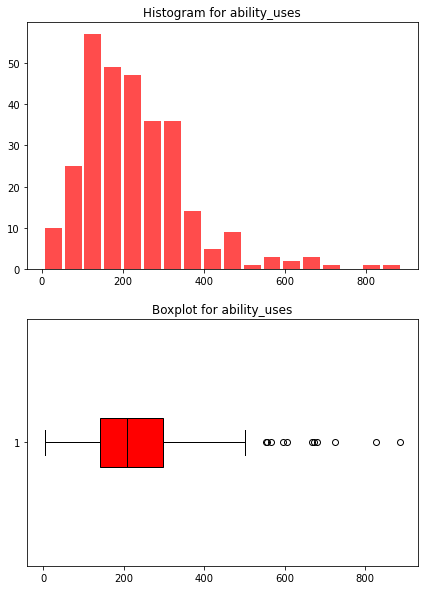

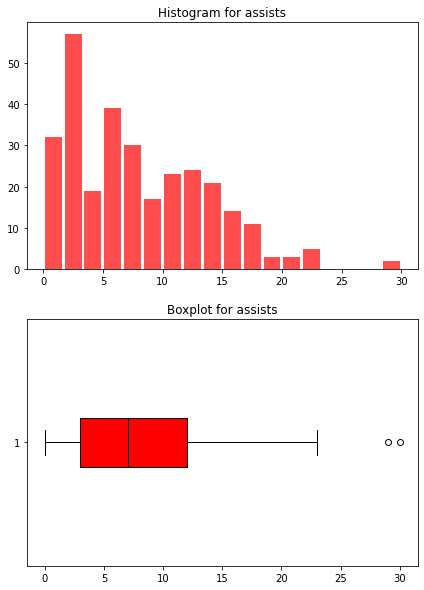

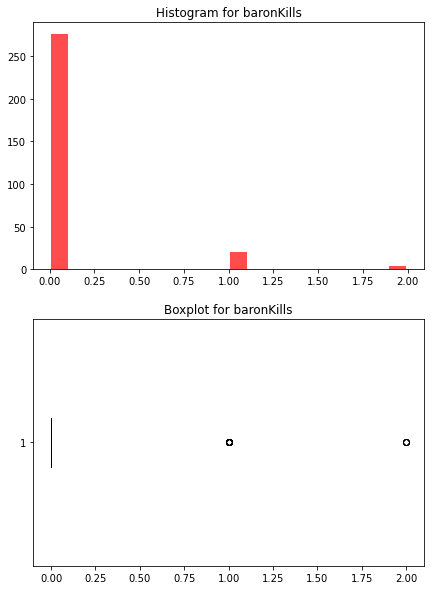

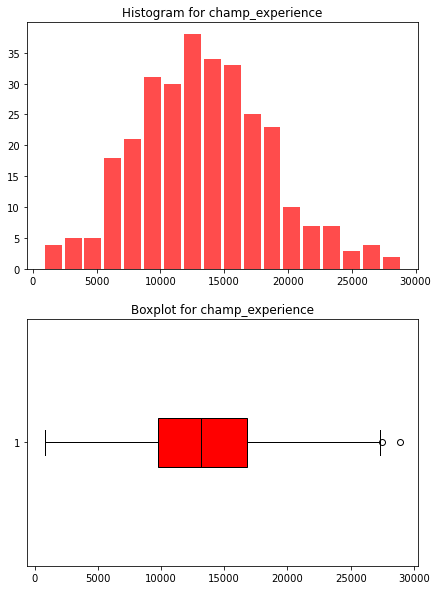

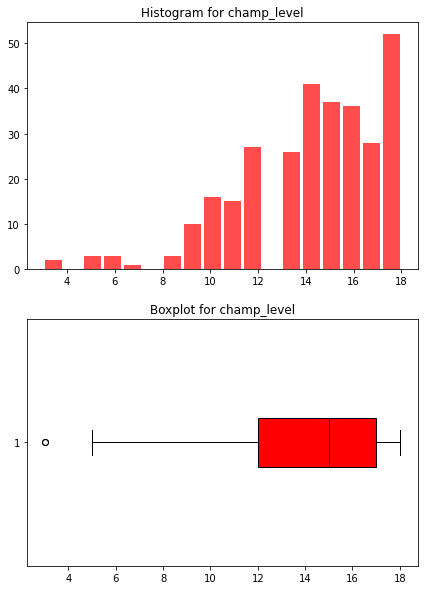

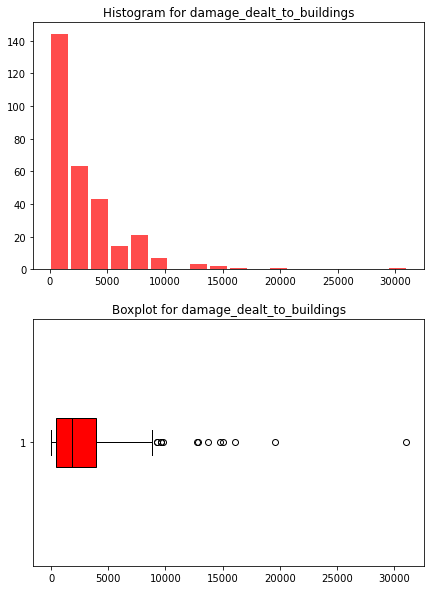

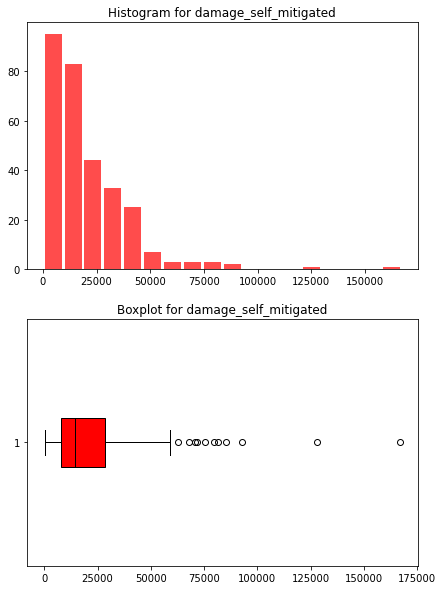

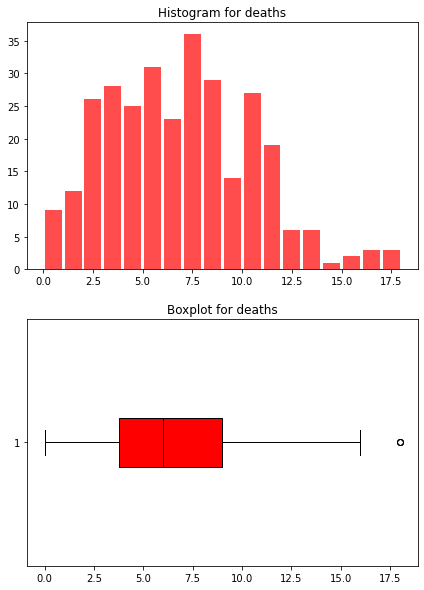

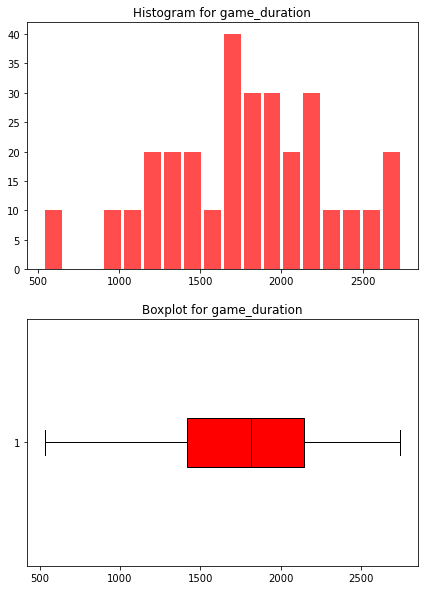

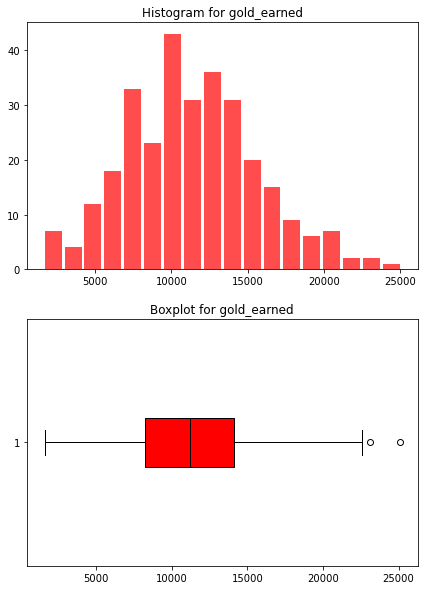

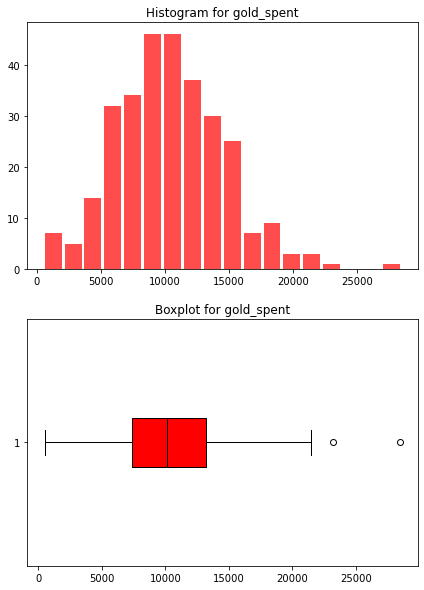

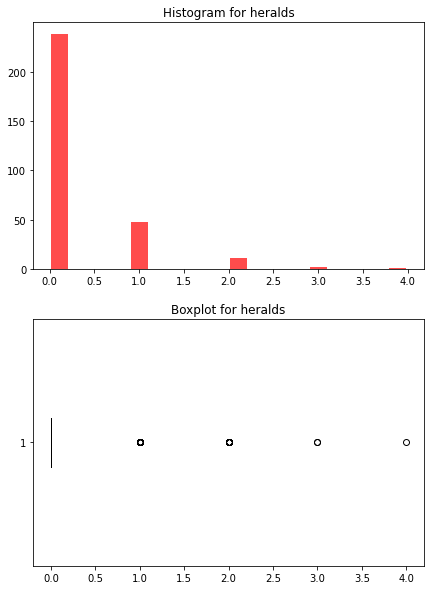

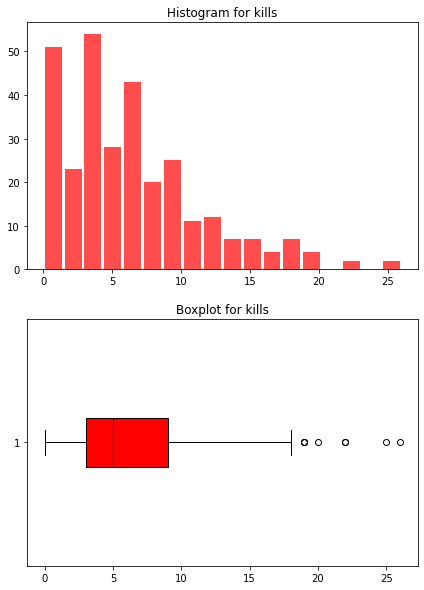

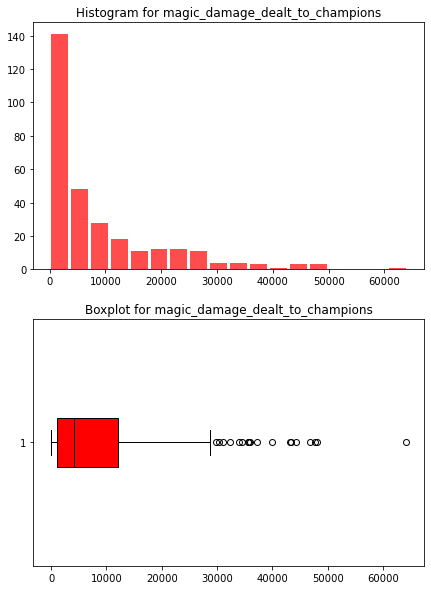

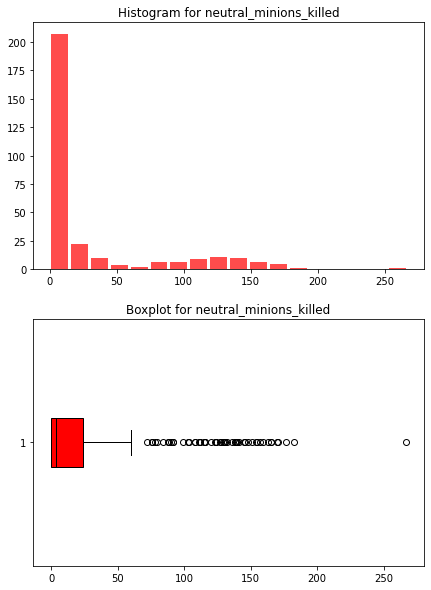

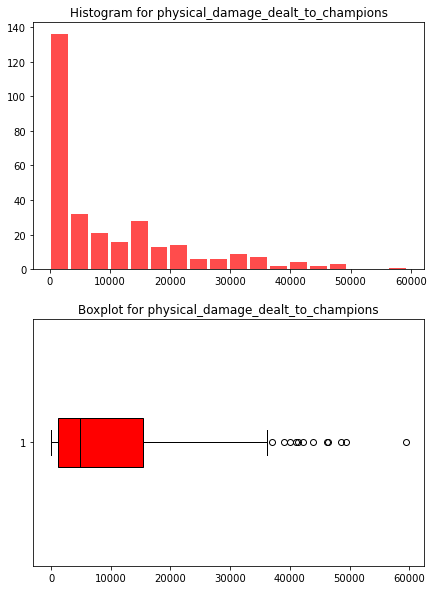

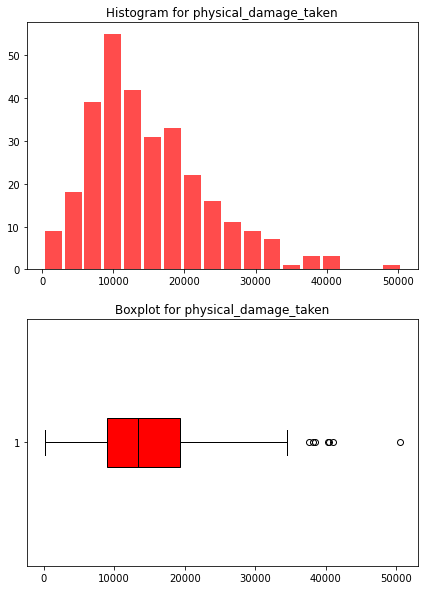

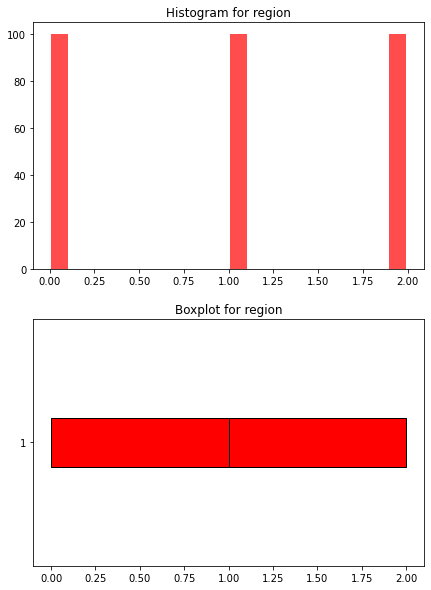

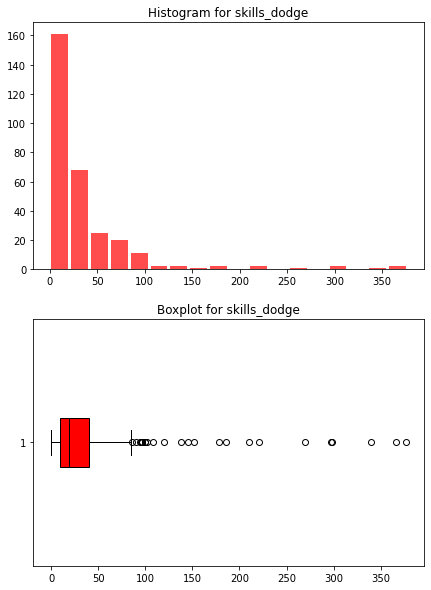

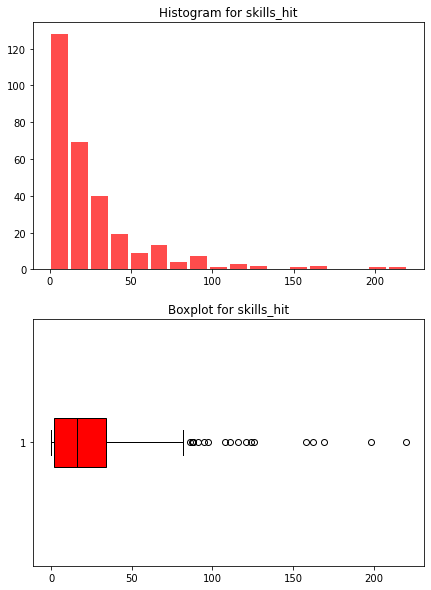

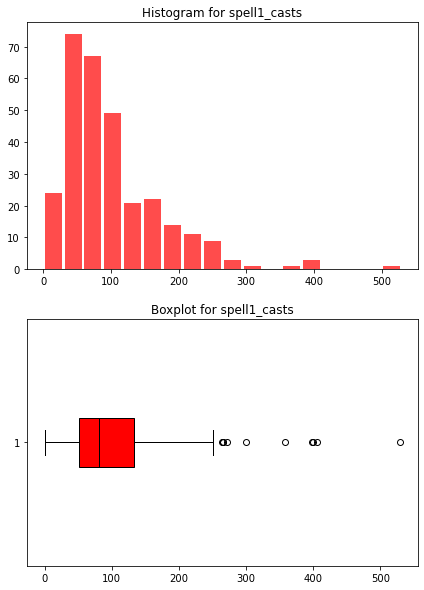

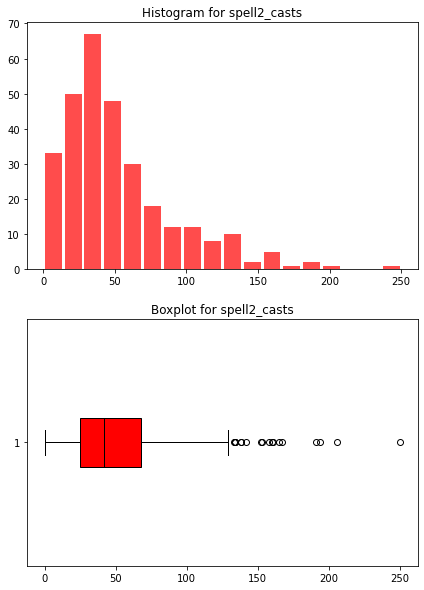

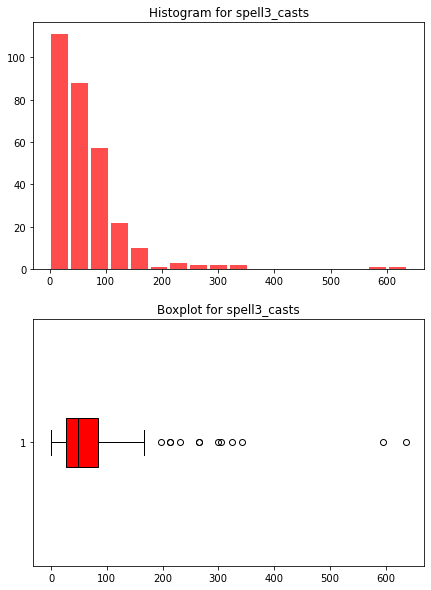

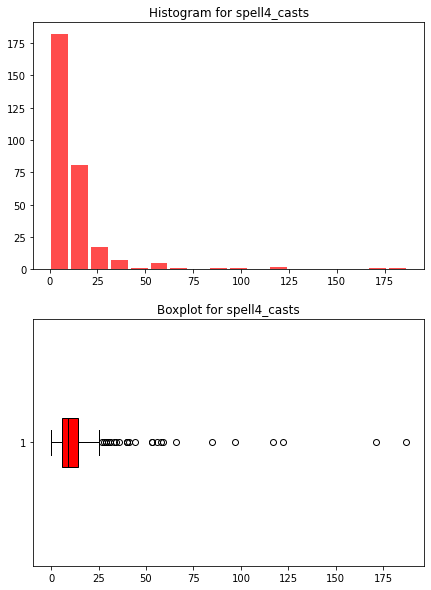

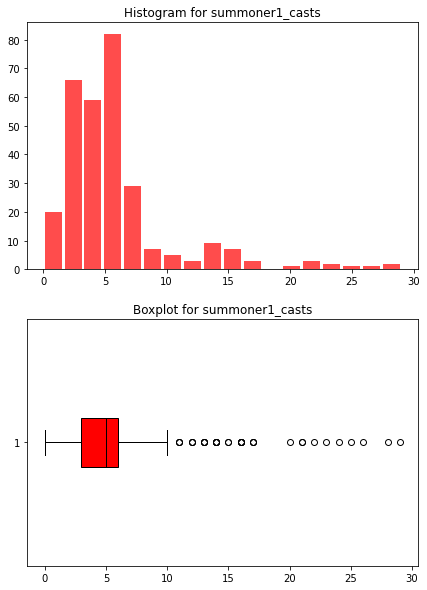

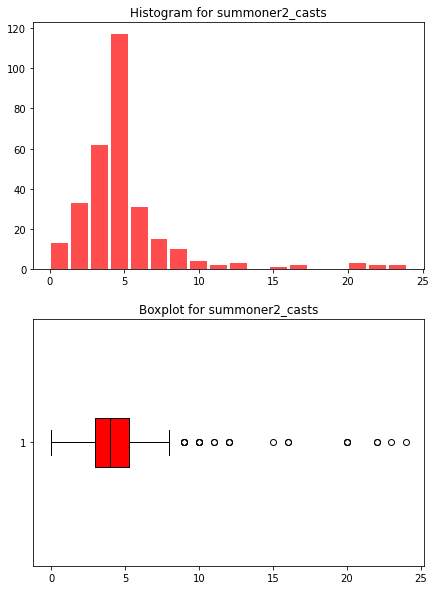

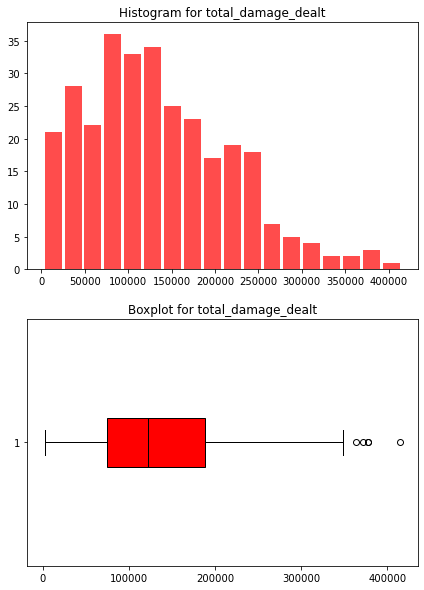

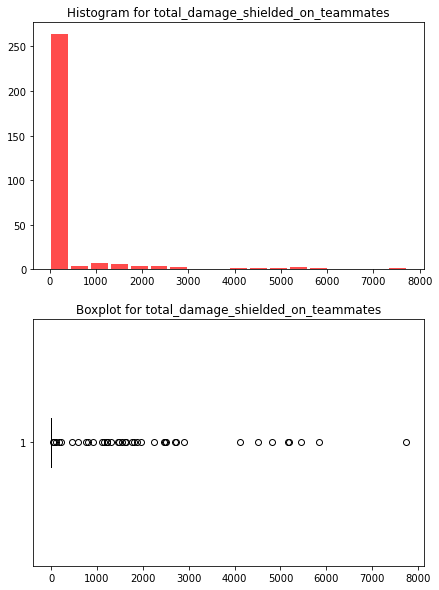

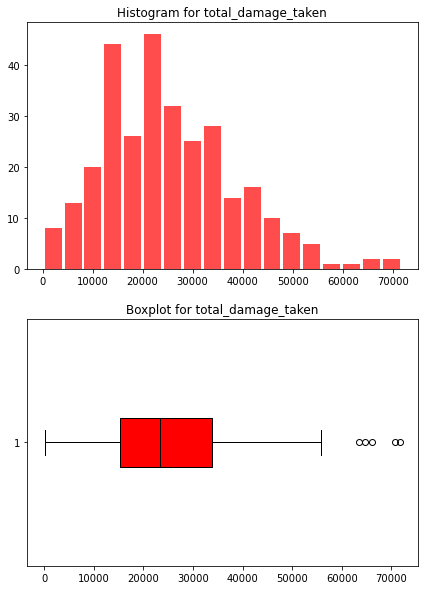

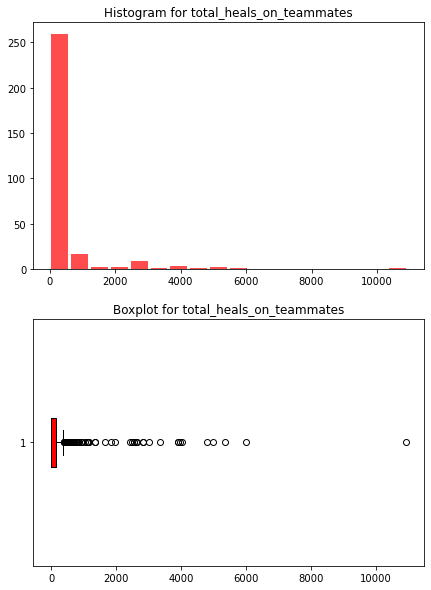

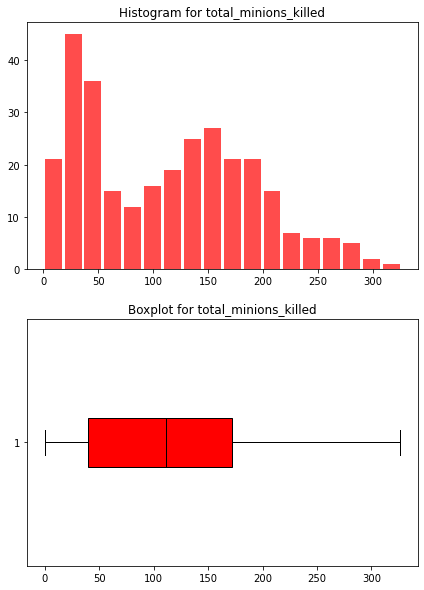

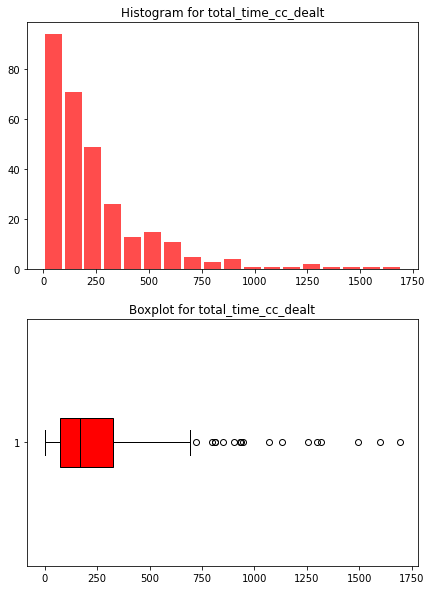

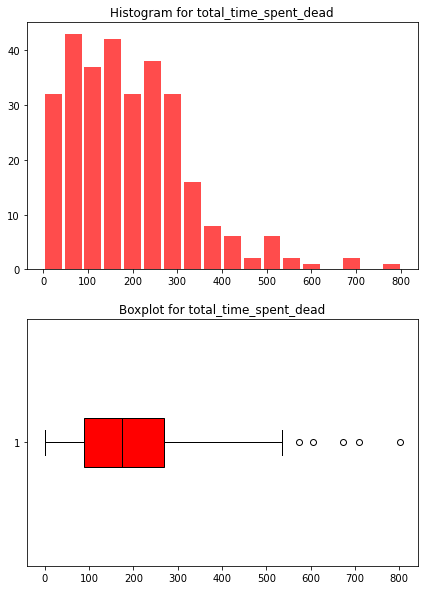

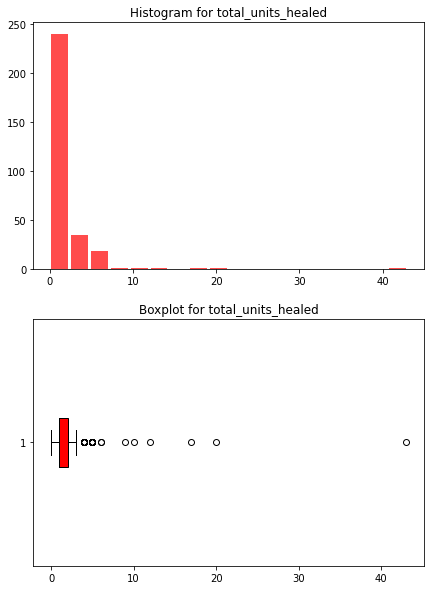

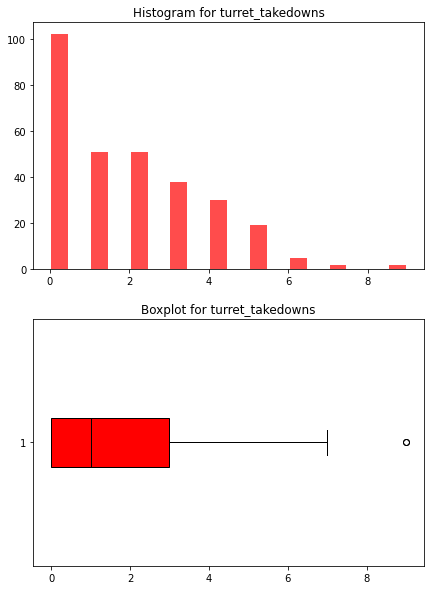

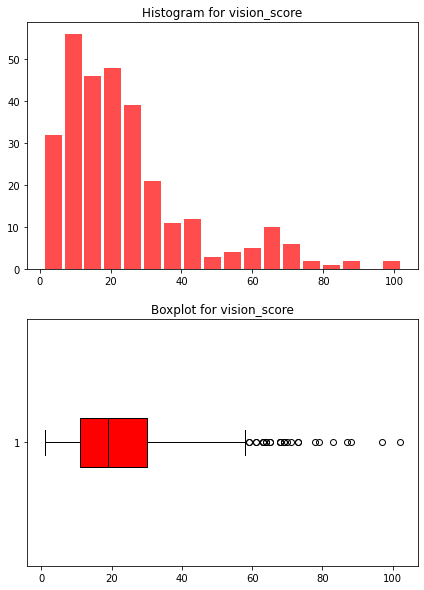

In [185]:
#histograma de las numéricas
categorical_columns = lol_df.select_dtypes(include=['category', 'object']).columns

for column in lol_df.columns:
    if set(lol_df[column].unique()) == {0, 1}:
        categorical_columns = categorical_columns.union([column])

filtered_columns = lol_df.columns.difference(categorical_columns)


for column in filtered_columns:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 10))

    ax1.hist(lol_df[column], bins=18, color='red', alpha=0.7, rwidth=0.85)
    ax1.set_title(f'Histogram for {column}')

    ax2.boxplot(lol_df[column], vert=False, widths=0.2, patch_artist=True,
                boxprops=dict(facecolor='red', color='black'), medianprops=dict(color='black'))
    ax2.set_title(f'Boxplot for {column}')

    plt.show()

Observando los plots, vemos como hay gran presencia de outliers. Esa presencia la consideramos normal, dado que cada campeón tiene su funcionaliadad/estilo de juego dentro de League of Legends, por lo que es normal tener esta dispersión de datos. Por ejemplo, si nos fijamos en los spells, hay campeones (normalmente midlaners) magos, los cuales su daño viene de dichas habilidades. En cambio, otros campeones, como los ADC, no requieren de tanto uso de dichas habilidades, ya que gran parte de su daño viene de los auto ataques.

Por lo que hace a las variables categóricas, destacar la posición individual + matches por region:

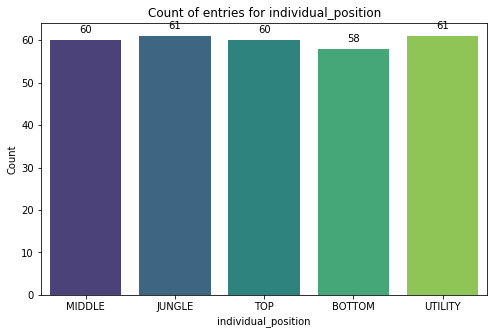

In [186]:
categorical_columns = lol_df.select_dtypes(include=['category', 'object']).columns

# Crear gráficos de barras para las columnas categóricas
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    
    # Crear el gráfico de barras
    sns.countplot(x=column, data=lol_df, palette='viridis')
    
    # Anotar los valores encima de las barras
    for p in plt.gca().patches:
        plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    plt.title(f'Count of entries for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

Vemos como tenemos un equilibrio de clases en el dataset. Es curioso como tenemos una descompensación en la botlane. Eso se debe a que en algún match se ha jugado doble support en bot (seraphine/senna)

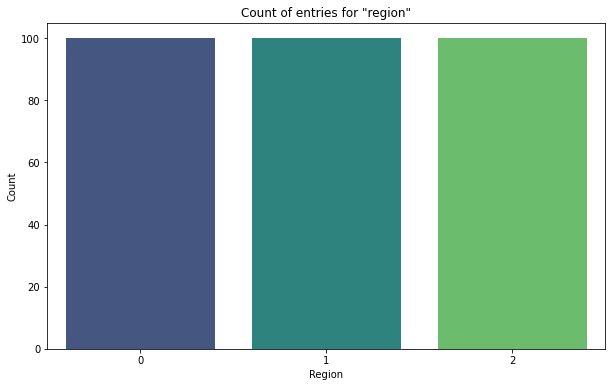

In [187]:
plt.figure(figsize=(10, 6))
sns.countplot(x='region', data=lol_df, palette='viridis')
plt.title('Count of entries for "region"')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

Lo mismo para region. Vemos como tenemos 10 partidas por server (*10 champs por partida). Se ha seleccionado así expresamente, pero siempre se puede ajustar en el código inicial de extracción de datos

### - Análisis de variables

Una parte importante a la hora de hacer regresiones es la selección de variables, tanto al dependiente como las independientes. Para ello, vamos a usar varias técnicas que nos van a permitir ver relaciones entre variables. Cabe destacar que, dado el objetivo de este trabajo, nuestra variable objetivo será 'gold_earned'. Ahora nuestro trabajo es encontrar que variables pueden describir el comportamiento de dicha variable, para así poder modelar las regresiones necesarias

#### Correlaciones

La primera técnica a usar es la correlación. Gracias a observar la matriz de correlación, podremos hacer un primer filtrado de que variable nos van a servir para las regresiones. De hecho, no solo queremos hacer un proceso de selección, sino que nuestro interés también se centra en encontrar LA VARIABLE que mejor describa el objetivo, para así poder hacer una comparativa de mejora entre usar 1 o varias variables independientes. 

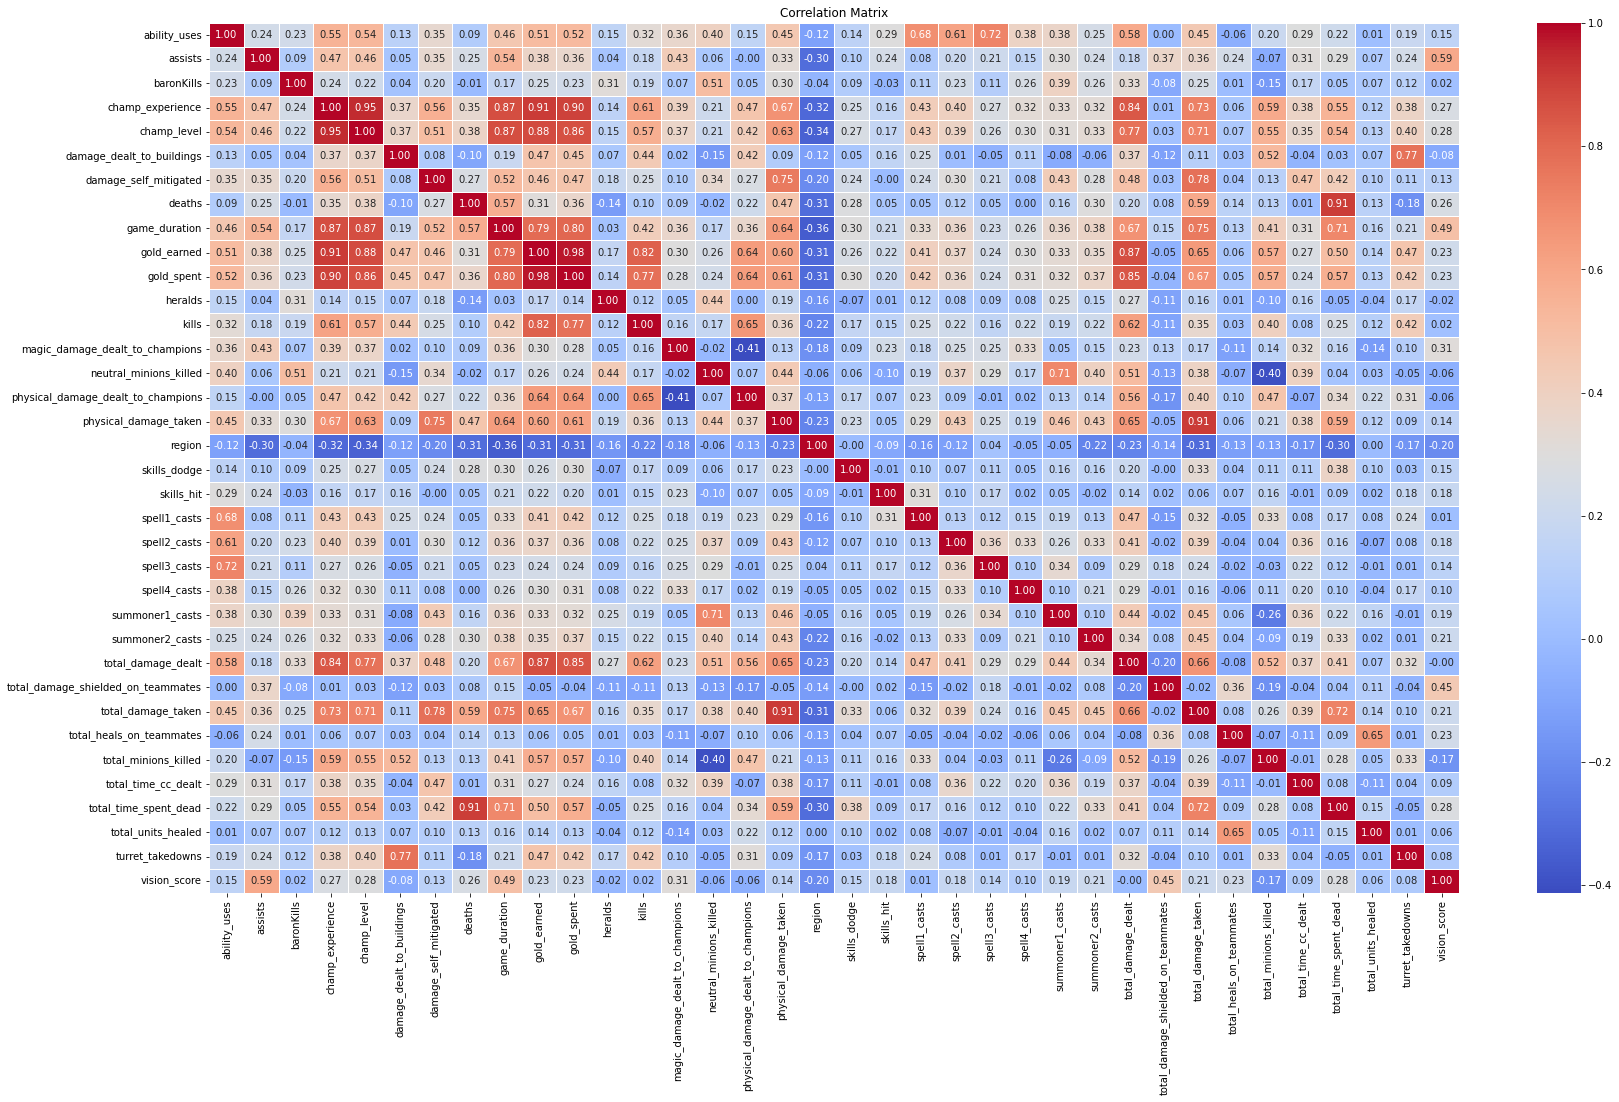

In [188]:
#correlation
correlation_matrix = lol_df[filtered_columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(28, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Dada la matriz de correlación y si nos fijamos en la variable 'gold_earned', hay muchas candidatas a describir el comportaimento de esta.

Por ahora, nos quedamos con las siguientes:

- total_damage_dealt: 0.87
- kills: 0.82
- game_duration: 0.72
- champ_experience: 0.91

Hay otras variables, como el gold_spent, que no se han seleccionado para evitar problemas en la interpretación de los coeficientes del modelo y en la estabilidad de las estimaciones (multicolinealidad). Hablando de ello, vamos a asegurar que entre las variables seleccionadas no exista una gran colinealidad:

In [189]:
correlation_matrix = lol_df[['total_damage_dealt', 'kills', 'game_duration', 'champ_experience']].corr()

print(correlation_matrix)

                    total_damage_dealt     kills  game_duration  \
total_damage_dealt            1.000000  0.623291       0.670409   
kills                         0.623291  1.000000       0.418285   
game_duration                 0.670409  0.418285       1.000000   
champ_experience              0.841948  0.612643       0.870452   

                    champ_experience  
total_damage_dealt          0.841948  
kills                       0.612643  
game_duration               0.870452  
champ_experience            1.000000  


Visto dicha matriz filtrada, podemos concluir que sí existe multicolinealidad entre las variables seleccionadas, dejando la lista anterior así:

- champ_experience: 0.91
- total_damage_dealt: 0.87
- kills: 0.82


De hecho, tiene sentido que game_duration se quede fuera, ya que como mas dura la partida, mas probable es que en la partida los champions tengan mas experiencia, hagan mas daño y obtengan mas kills. Por ello, la descartamos.

Aún así, podemos reforzar las decisiones hechas con la matriz de correlacion con otras técnicas vistas en estadística, tales como la información mútua y la PCA:



#### Mutual Information

In [190]:
# Encode categorical variables
le = LabelEncoder()
for column in lol_df.select_dtypes(include=['category', 'object']).columns:
    lol_df[column] = le.fit_transform(lol_df[column])

target_column = 'gold_earned'
y = lol_df[target_column]

X = lol_df.drop(target_column, axis=1)

mutual_info_scores = mutual_info_regression(X, y)

mi_df = pd.DataFrame(mutual_info_scores, index=X.columns, columns=['Mutual Information'])

mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)


                                    Mutual Information
gold_spent                                    1.853382
champ_experience                              0.926924
champ_level                                   0.905369
total_damage_dealt                            0.771837
kills                                         0.633450
game_duration                                 0.559574
physical_damage_dealt_to_champions            0.421639
total_minions_killed                          0.400548
total_damage_taken                            0.319411
physical_damage_taken                         0.300861
ability_uses                                  0.299034
spell4_casts                                  0.295466
damage_self_mitigated                         0.292708
neutral_minions_killed                        0.240599
vision_score                                  0.236060
magic_damage_dealt_to_champions               0.234668
total_time_spent_dead                         0.215451
damage_dea

La información mutua también nos puede servir para determinar las variables independientes más relevantes. De hecho, hay una función, **mutual_info_regression()**, que calcula la información mutua entre cada característica de X y la variable objetivo Y, independientemente de las características restantes de X [N]. 

Dado los resultados, vemos como, efectivamente, la variable más representativa es gold_spent. Aun así, como hemos observado en el apartado anterior, no la vamos a escoger, dado que puede introducir problemas en nuestro modelo (además, no tiene gracia explicar el oro que obtienes con el oro que te gastas en la tienda, ya que en la mayoría de casos será prácticamente lo mismo y no aportaríamos valor con el modelo de regresión a implementar).

Por lo que, de momento, nuestra lista se queda así (por prioridad):

- champ_experience: 0.91 + 0.92
- total_damage_dealt: 0.87 + 0.77
- kills: 0.82 + 0.63

#### PCA

Por último, vamos a hacer una PCA para acabar de afinar los resultados obtenidos hasta ahora:

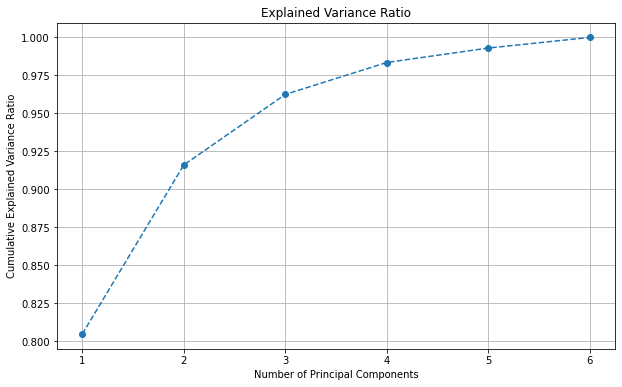

PC1: Columna: champ_experience, Valor: 0.4405064425022833
PC2: Columna: kills, Valor: 0.7989989934380842
PC3: Columna: total_damage_dealt, Valor: 0.8460905320620454
PC4: Columna: champ_level, Valor: 0.6558348525797304
PC5: Columna: gold_spent, Valor: 0.7961063640611796
PC6: Columna: champ_experience, Valor: 0.7677604122071642


In [191]:
high_corr = abs(lol_df.corr()['gold_earned']) >= 0.7

reg_selected = lol_df.loc[:, high_corr].columns

df_reg = lol_df[reg_selected]

selected_columns = lol_df.loc[:, high_corr].drop('gold_earned', axis=1).columns

df_selected = lol_df[selected_columns]


scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_selected)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame to store the results
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i}' for i in range(1, len(df_selected.columns) + 1)])

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(df_selected.columns) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

n_components_to_keep = 6

df_pca = pd.DataFrame(
    data    = pca.components_,
    columns = df_selected.columns,
    index   = [f'PC{i+1}' for i in range(n_components_to_keep)]
)

df_pca_abs = df_pca.abs()
max_abs_values = df_pca_abs.apply(lambda row: row.sort_values(ascending=False).iloc[0], axis=1)
max_abs_columns = df_pca_abs.apply(lambda row: row.sort_values(ascending=False).idxmax(), axis=1)


for i, column in enumerate(df_pca.columns):
    print(f'PC{i+1}: Columna: {max_abs_columns.iloc[i]}, Valor: {max_abs_values.iloc[i]}')

Dado que con 3 componentes explicamos casi un 98% de la variabilidad de los datos, nos vamos a quedar con las tres variables que más representan cada componente.

En este caso, como no, coinciden con las variables que hemos estado viendo hasta ahora. Si actualizamos el ranking...

- champ_experience: 0.91 + 0.92 + PC1(0.44)
- total_damage_dealt: 0.87 + 0.77 + PC2(0.79)
- kills: 0.82 + 0.63 + PC3(0.84)

### - Conclusiones

Más allá de las conclusiones ya extraídas en la anterior entrega, me gustaría destacar la importancia del proceso de selección de variables. Para el caso que nos ocupa, hemos generado nostros mismos el dataset con las variables que se han considerado más importantes a la hora de describir el oro generado. Esto implica que hay un primer filtrado hecho manual a partir de los conocimientos del dominio (insistio, bronze). Si nos ponemos en el caso de generar un dataset con TODAS las variables que tenemos de cada personaje para cada match, este proceso de selección puede tener incluso más valor. Aun así, hacer un filtrado antes de mirar que es lo que dicen los datos también supone un beneficio para nostros: reafirmar nuestro conocimiento sobre dicho dominio. 

Por ejemplo, se ha incluido los spells usados e incluso las skills que han hecho hit, pensando que podría haber una relación entre la proporción de acierto de tus skills con el oro generado. Pero los datos no lo afirman. De hecho, no parece que haya una relación significativa como para considerarse una variable relevante para describir el oro que se genera.

Dejando de lado esta reflexión, podemos concluir que las variables más relevantes para describir nuestra variable objetivo son (ordenadas por prioridad):

- **champ_experience**: 0.91 + 0.92 + PC1(0.44)
- **total_damage_dealt**: 0.87 + 0.77 + PC2(0.79)
- **kills**: 0.82 + 0.63 + PC3(0.84)

### 2.2 Regresión


En el siguiente apartado, dadas las variables seleccionadas, vamos a jugar con distintos tipos de regresión y combinaciones de varaibles, para así sacar conclusiones de las mismas

In [192]:
X = df_reg[['champ_experience']]
y = df_reg['gold_earned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 3117105.2652318776
R-squared: 0.8025344513171745


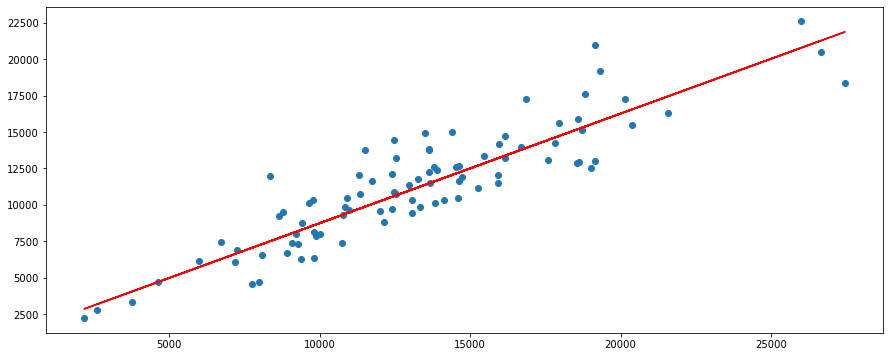

In [193]:
plt.figure(figsize = (15, 6))
plt.scatter(X_test, y_test, label = "Testing points")
plt.plot(X_test, y_pred, label = "Predicted points", c = 'r')
plt.show()

Usando tan solo una variable independiente (la que, a priori, describe más a nuestra variable objetivo), obtenemos un modelo relativamente bueno, en donde el error R-squared es 0.80. Dicho cálculo nos indica que el 80% de la variación de 'gold_earned' presente en los datos se puede explicar dado este modelo, es decir, gracias a los predicadores escogidos.

In [194]:
X = df_reg[['champ_experience','kills','total_damage_dealt']]
y = df_reg['gold_earned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 897692.9107459883
R-squared: 0.943132038193791


Si incluimos el resto de variables escogidas, el modelo mejora mucho: ahora podemos explicar un 94% de la variación de los datos en gold_earned.

Aunque, dado el modelo que vemos al usar una sola variable, podemos afirmar que la relación entre variables sigue una relación lineal, vamos a probar una relación no lineal, para ver si se ajusta mejor el modelo:

Degree: 1, RMSE: 676.7522156689193
Degree: 1, R-squared: 0.9670344721993194
Degree: 2, RMSE: 630.1560523660929
Degree: 2, R-squared: 0.9714177190051554


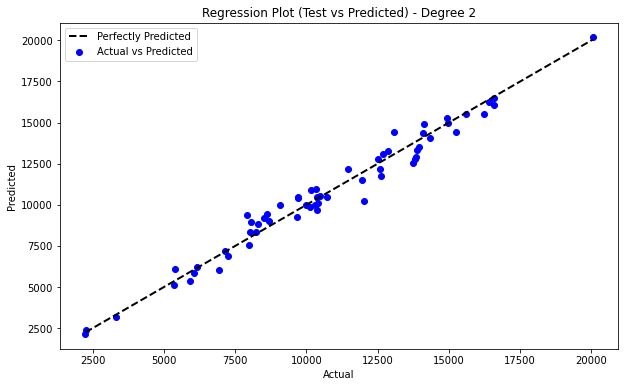

Degree: 3, RMSE: 700.6248631659266
Degree: 3, R-squared: 0.9646677128699519
Degree: 4, RMSE: 785.0444541800425
Degree: 4, R-squared: 0.9556402427654298
Degree: 5, RMSE: 1260.0651403738705
Degree: 5, R-squared: 0.8857156783393794


In [195]:
X_p = df_reg[['champ_experience','kills','total_damage_dealt']]

y_p = df_reg[['gold_earned']]

X_train, X_test, y_train, y_test = train_test_split(X_p, y_p, test_size = 0.2, random_state = 1)


max_degree = 5
dataC=pd.DataFrame()
for degree in range(1, max_degree + 1):
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred = model.predict(X_test_poly)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    datad = pd.DataFrame({'Degree': [degree], 'RMSE': [rmse], 'R2': [r2], 'Coefficients': [model.coef_[0]]})
    dataC = pd.concat([dataC, datad]).reset_index(drop=True)
    print(f"Degree: {degree}, RMSE: {rmse}")
    print(f"Degree: {degree}, R-squared: {r2}")

    if degree == 2:
        y_pred_opt = y_pred
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, y_pred, c='blue', label='Actual vs Predicted')
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfectly Predicted')
        plt.title(f'Regression Plot (Test vs Predicted) - Degree {degree}')
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.legend()
        plt.show()

Tal y como podemos ver, si transformamos las características originales en polinómicas, a partir del grado 5 empezamos a obtener un modelo peor que con una relación lineal. Esto se debe a que, a partir de ese grado estamos adaptando demasiado el modelo a los datos de training, por lo que a la que ve nuevos datos, el modelo esta sobreajustado y no predice correctamente.

Aún así, vemos como con un polinomio de grado 2 mejoramos el modelo en un 3%. No supone un cambio sustancial, lo que nos hace pensar que efectivamente la relación es muy lineal (no sigue una forma que requiera de ser descrita con un polinomio).

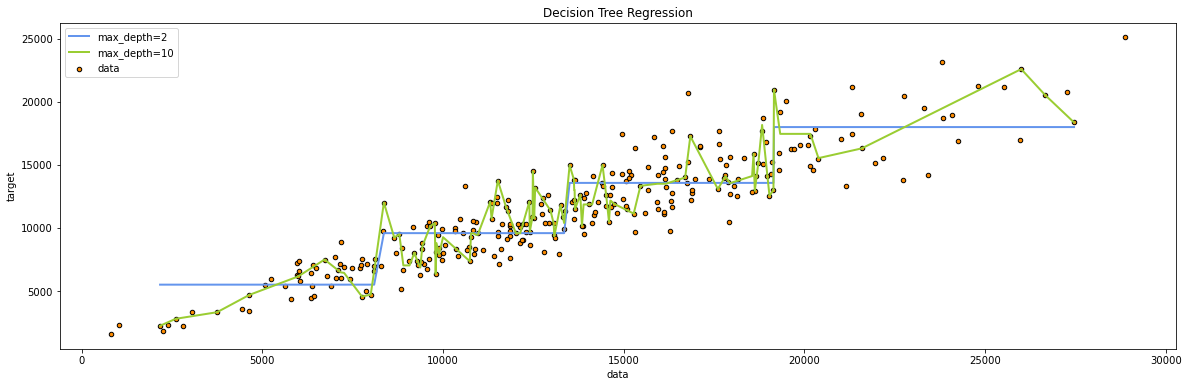

Metrics for max_depth=2:
Mean Squared Error: 27766593.192598835
R-squared Score: -0.7589863329243285

Metrics for max_depth=10:
Mean Squared Error: 32004371.55035321
R-squared Score: -1.0274454183276958


In [196]:
X = df_reg[['champ_experience']]
y = df_reg['gold_earned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=10)
regr_1.fit(X, y)
regr_2.fit(X, y)

X_test = X_test.sort_values(by = 'champ_experience', ascending = True)

y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

plt.figure(figsize = (20, 6))
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=10", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

mse_1 = mean_squared_error(y_test,y_1)
r2_1 = r2_score(y_test, y_1)

mse_2 = mean_squared_error(y_test, y_2)
r2_2 = r2_score(y_test, y_2)

print("Metrics for max_depth=2:")
print(f"Mean Squared Error: {mse_1}")
print(f"R-squared Score: {r2_1}")

print("\nMetrics for max_depth=10:")
print(f"Mean Squared Error: {mse_2}")
print(f"R-squared Score: {r2_2}")

Usando un DecisionTreeRegresor como modelo, los resultados son desastrosos. Con una depth de 2, vemos como el error R-squared da negativo. Esto indica que el modelo de regresión es peor que un modelo que simplemente predice la media de la variable dependiente.

Por otro lado, con una profundidad de 10, el error nos da superior a 1 (y negativo). Por lo que, aparte de la conclusión anterior, podemos afirmar que el modelo esta sobreajustado (ya que no hay error en los datos de entrada, como hemos visto en el apartado de limpieza).

In [197]:
X_p = df_reg[['champ_experience', 'kills', 'total_damage_dealt']]
y_p = df_reg['gold_earned']

X_train, X_test, y_train, y_test = train_test_split(X_p, y_p, test_size=0.2, random_state=1)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = SVR(kernel='linear',epsilon=0.1)
classifier.fit(X_train, y_train)
ypred = classifier.predict(X_test)

mse = mean_squared_error(y_test, ypred)
r2 = r2_score(y_test, ypred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 11622304.274814468
R-squared Score: 0.1634480766552875


Por último, se ha querido probar la función SVR() : Epsilon-Support Vector Regression[N]. El valor de épsilon determina el ancho del tubo alrededor de la función estimada.

Se han probado distntos valores de épsilon, pero o el error se ha quedado igual o a empeorado. El hecho de que el modelo SVR con kernel lineal y un pequeño valor de épsilon (0.1) tenga un R-squared bajo sugiere que este modelo puede no ser adecuado para capturar la estructura subyacente de los datos en este caso particular. Podría ser necesario probar diferentes kernel y valores de parámetros para el SVR para obtener un mejor ajuste a los datos.

### 2.3 Optativa


Para la parte optativa de esta entrega, se nos pide realizar la misma clasificación de distintas maneras:

- 1. Clasificación bajo condiciones iniciales.
- 2. Clasificación con 10% menos de datos sobre la variable objetivo.
- 3. Clasificación con ese 10% igual a los datos obtenidos de la regresión (en nuestro caso la polinómica de grado 2).

#### - Clasificación 1

In [198]:
target_column = 'individual_position'

columns_except_target = [col for col in lol_df.columns if col != target_column]

lol_df = lol_df[columns_except_target + [target_column]]

X = lol_df.iloc[:, :-1]
df_c = lol_df

for column in X.columns:
    if lol_df[column].dtypes == object:
        df_c[column] = lol_df[column].astype("category").cat.codes

X = df_c.iloc[:, :-1].values
y = df_c.iloc[:, -1].values

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=62)

model_params={
    'max_leaf_nodes':[50,100,500,5000],
    'min_samples_split':[2,4,6]
}

model = DecisionTreeClassifier(random_state=26)
gscv = GridSearchCV(model, model_params, cv =3)
model_gs = gscv.fit(X_train, y_train)
print("Best: %f using %s" % (model_gs.best_score_,model_gs.best_params_))


Best: 0.670833 using {'max_leaf_nodes': 50, 'min_samples_split': 2}


Accuracy: 0.65

Confusion Matrix:

Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.43      0.33         7
           1       1.00      0.85      0.92        13
           2       0.75      0.43      0.55        14
           3       0.47      0.58      0.52        12
           4       0.80      0.86      0.83        14

    accuracy                           0.65        60
   macro avg       0.66      0.63      0.63        60
weighted avg       0.70      0.65      0.66        60



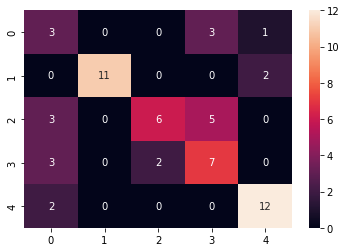

In [199]:
model = DecisionTreeClassifier(max_leaf_nodes=50, min_samples_split=2, criterion='entropy')
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
sns.heatmap(conf_matrix, annot=True, fmt='.0f')
print("\nClassification Report:")
print(classification_rep)



Para la clasificación inicial, partimos de una accuracy del 65%, usando todas las variables del dataset nuevo. Es decir, no se ha estudiado/filtrado las variables para detectar aquellas que mejor se adapten al modelo de clasificación, sino que se han usado todas

#### - Clasificación 2

In [200]:
ultimos_indices = lol_df.index[-30:]

lol_df.loc[ultimos_indices, 'gold_earned'] = np.nan

In [201]:
target_column = 'individual_position'

columns_except_target = [col for col in lol_df.columns if col != target_column]

lol_df = lol_df[columns_except_target + [target_column]]

X = lol_df.iloc[:, :-1]
df_c = lol_df

for column in X.columns:
    if lol_df[column].dtypes == object:
        df_c[column] = lol_df[column].astype("category").cat.codes

In [202]:

df_c = df_c.iloc[:-30, :]
X = df_c.iloc[:, :-1].values
y = df_c.iloc[:, -1].values


In [203]:
scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=62)

model_params={
    'max_leaf_nodes':[50,100,500,5000],
    'min_samples_split':[2,4,6]
}

model = DecisionTreeClassifier(random_state=26)
gscv = GridSearchCV(model, model_params, cv =3)
model_gs = gscv.fit(X_train, y_train)
print("Best: %f using %s" % (model_gs.best_score_,model_gs.best_params_))

Best: 0.662037 using {'max_leaf_nodes': 50, 'min_samples_split': 4}


Accuracy: 0.74

Confusion Matrix:

Classification Report:
              precision    recall  f1-score   support

           0       0.54      1.00      0.70         7
           1       1.00      0.80      0.89        15
           2       0.58      0.64      0.61        11
           3       0.70      0.54      0.61        13
           4       1.00      0.88      0.93         8

    accuracy                           0.74        54
   macro avg       0.76      0.77      0.75        54
weighted avg       0.78      0.74      0.75        54



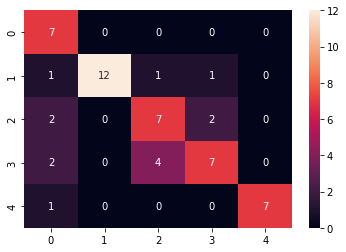

In [204]:
model = DecisionTreeClassifier(max_leaf_nodes=50, min_samples_split=4, criterion='entropy')
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
sns.heatmap(conf_matrix, annot=True, fmt='.0f')
print("\nClassification Report:")
print(classification_rep)

Para la segunda clasificación, la accuracy sorprendentemente mejora casi un 10%. En este caso, hemos quitado 30 filas de datos

#### - Clasificación 3

In [205]:
lol_df.loc[ultimos_indices, 'gold_earned'] = y_pred_opt[:30]

In [206]:
target_column = 'individual_position'

columns_except_target = [col for col in lol_df.columns if col != target_column]

lol_df = lol_df[columns_except_target + [target_column]]

X = lol_df.iloc[:, :-1]
df_c = lol_df

for column in X.columns:
    if lol_df[column].dtypes == object:
        df_c[column] = lol_df[column].astype("category").cat.codes

In [207]:
X = df_c.iloc[:, :-1].values
y = df_c.iloc[:, -1].values

In [208]:
scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=62)

model_params={
    'max_leaf_nodes':[50,100,500,5000],
    'min_samples_split':[2,4,6]
}

model = DecisionTreeClassifier(random_state=26)
gscv = GridSearchCV(model, model_params, cv =3)
model_gs = gscv.fit(X_train, y_train)
print("Best: %f using %s" % (model_gs.best_score_,model_gs.best_params_))

Best: 0.670833 using {'max_leaf_nodes': 50, 'min_samples_split': 2}


Accuracy: 0.63

Confusion Matrix:

Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.29      0.29         7
           1       1.00      0.92      0.96        13
           2       0.62      0.36      0.45        14
           3       0.41      0.58      0.48        12
           4       0.75      0.86      0.80        14

    accuracy                           0.63        60
   macro avg       0.61      0.60      0.60        60
weighted avg       0.65      0.63      0.63        60



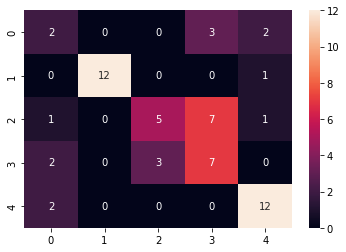

In [209]:
model = DecisionTreeClassifier(max_leaf_nodes=50, min_samples_split=2, criterion='entropy')
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
sns.heatmap(conf_matrix, annot=True, fmt='.0f')
print("\nClassification Report:")
print(classification_rep)

Por último, restableciendo el dataset inicial y reemplazando la columna 'gold_earned' con la mejor predicción hecha, vemos como nos quedamos cerca de conseguir la misma accuracy que en la clasificación original.

## 3. Conclusiones

Gracias a los modelos de regresión estudiados, junto con el entendimiento y limpieza del dataset generado, podemos finalmente proponer una estrategia a los jugadores para generar más oro en sus partidas, y así, como consecuencia, ganar. Hemos observado como las variables que más influyen a la hora de explicar la variabilidad de nuestra variable objetivo, gold_earned, son:

- **champ_experience**
- **total_damage_dealt**
- **kills**

De hecho, cabe destacar que una cosa es la capacidad que tenga una variable para describir a otra, y la otra es como interpretamos o traducimos este conocimiento en una estrategia (en este caso para ganar más oro). Dicho de otra manera: sería erróneo concluir que con tan solo priorizar la experiencia del campeón, se va a generar más oro. 

Es por ello, que una posible lectura, dadas las variables seleccionadas, sería la siguiente: hay que priorizar el daño (tanto a campeones como a torretas). Si se quiere generar más oro que el rival y, como consecuencia, ganar la partida, debemos pickear campeones que aporten daño a la partida y también conseguir kills.

También podemos hacer una lectura inversa, fijándonos en las variables que no se han tenido en consideración a la hora de generar oro que, a priori, podemos considerar válidas. De entre estas, destacamos las **curaciones** y **escudos**, juntamente con los **heraldos**. Tal y como hemos analizado, proteger a aliados no va a hacer que tú, como jugador individual, ganes mas oro, por lo que a priori puede indicar una derrota segura. Aun así, si con dichas curas/escudos se consigue marcar la diferencia para que otros miembros consigan kills y torretas, entonces también se puede considerar buena estrategia. Aunque, desde el punto de vista de los datos, si los 5 campeones se usan para priorizar el daño, entonces hay más posibilidades de ganar la partida.

Desde un punto de vista de Sistemas Basados en el Conocimiento, destacar que las regresiones encontradas han sido prácticamente idílicas, ya que las relaciones han sido muy próximas a lineales. Aun así, hemos comprobado que hasta el mínimo cambio, como podría ser usar un modelo polinómico de grado 2, puede mejorar el modelo, por lo que siempre vale la pena explorar estos. Además, los árboles de decisión como regresores nos han confirmado lo visto a clase: no dan la talla. En este caso, gracias a los errores R-squared hemos visto que el modelo no se ajusta correctamente a los datos, ya sea por su poca fiabilidad o por la presencia de sobreajuste.

Por último, vamos a comentar la parte optativa, ya que los resultados han sorprendido. Partiendo de una accuracy del 65%, al quitarle datos del dataset, la accuracy ha aumentado. La posible razón por la cual esto pasa puede ser porque no se ha hecho un estudio de que variables se ajustan más para este modelo de clasificación en concreto, y se han usado todas las variables presentes. Lo que ello conlleva es una presencia de ruido o características redundantes, por lo que quitar registros puede llegar a ser beneficioso para el algoritmo. Aun así, si vamos a la parte interesante, la clasificación 3, vemos como la accuracy comparada con la clasificación original es prácticamente la misma (63%). Este dato tiene sentido, ya que hemos conseguido una accuracy del 97% en la predicción de la regresión. Ese 97% no es 100%, por lo que algunos valores pueden llegar a introducir ruído, generando esos problemas de clasificación extra (que nos hace bajar un 2% la accuracy). Aun así, siendo una diferencia ínfima, dependiendo el caso de uso sí que puede marcar la diferencia

## 4. Bibliografia

- [1]. Sklearn.svm.SVR. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
- [2]. sklearn.feature_selection.mutual_info_regression. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html
